In [18]:
#| default_exp app


In [1]:
#|export
from fastai.vision.all import *
import gradio as gr



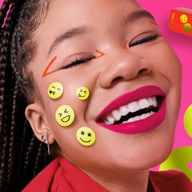

In [2]:
im = PILImage.create('joyful_face.jpg')
im.thumbnail((192,192))
im

In [3]:
#|export
learn = load_learner('model.pkl')


In [4]:
learn.predict(im)

('joyful', tensor(0), tensor([0.9538, 0.0062, 0.0400]))

In [5]:
#|export 
categories = ('joyful', 'neutral', 'sad')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [6]:
classify_image(im)

{'joyful': 0.9537717700004578,
 'neutral': 0.006246933713555336,
 'sad': 0.039981309324502945}

In [8]:
 #|export
image = gr.Image(image_mode='RGB', height=192, width=192)
label = gr.Label()
examples = ['joyful_face.jpg', 'neutral_face.jpg', 'sad_face.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 3.41.2, however version 4.44.1 is available, please upgrade.
--------


In [10]:
m = learn.model

Actually, apprently the new way to do this is to run `nbdev_export` in the project directory...

No its not, just do the below

In [13]:
from nbdev.export import nb_export
nb_export("gradio_template.ipynb")
